In [41]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, accuracy_score, f1_score, precision_score
from sklearn.model_selection import train_test_split
import seaborn as sns
import xgboost as xgb
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam



In [42]:
# Load SVD file
svd_file_path = "/Users/navyakalyani/Downloads/drug_project/svd_drug_pair_features.h5"

with h5py.File(svd_file_path, "r") as h5f:
    X_train = h5f["X_train"][:]
    y_train = h5f["y_train"][:]
    X_val = h5f["X_val"][:]
    y_val = h5f["y_val"][:]
    X_test = h5f["X_test"][:]
    y_test = h5f["y_test"][:]

# Checking the shapes
print(f"X_train shape: {X_train.shape}")
print(f"X_val shape: {X_val.shape}")
print(f"X_test shape: {X_test.shape}")



X_train shape: (626978, 200)
X_val shape: (134353, 200)
X_test shape: (134353, 200)


In [43]:
# Evaluation Metrics Functions
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
    plt.title(f"Confusion Matrix - {model_name}")
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

def plot_roc_curve(y_true, y_pred, model_name):
    fpr, tpr, _ = roc_curve(y_true, y_pred)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic - {model_name}')
    plt.legend(loc="lower right")
    plt.show()

def print_classification_report(y_true, y_pred, model_name):
    print(f"Classification Report for {model_name}:\n")
    print(classification_report(y_true, y_pred))

def print_metrics(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)

    print(f"{model_name} - Accuracy: {accuracy:.4f}")
    print(f"{model_name} - F1 Score: {f1:.4f}")
    print(f"{model_name} - Precision: {precision:.4f}")

    plot_confusion_matrix(y_true, y_pred, model_name)
    plot_roc_curve(y_true, y_pred, model_name)
    print_classification_report(y_true, y_pred, model_name)




Random Forest Model Evaluation:
Random Forest - Accuracy: 0.6489
Random Forest - F1 Score: 0.5901
Random Forest - Precision: 0.7102


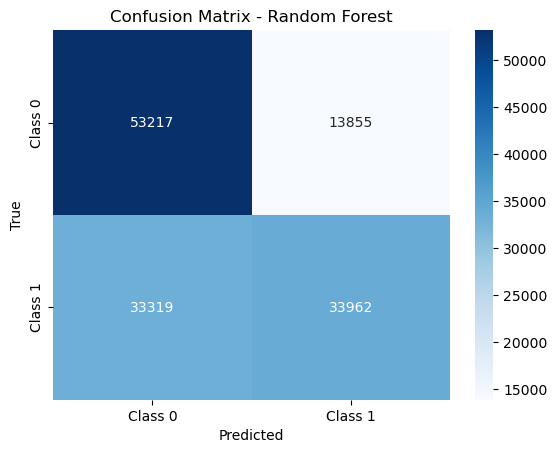

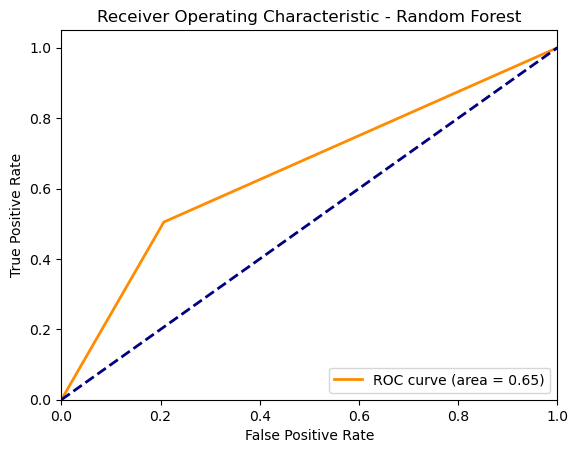

Classification Report for Random Forest:

              precision    recall  f1-score   support

           0       0.61      0.79      0.69     67072
           1       0.71      0.50      0.59     67281

    accuracy                           0.65    134353
   macro avg       0.66      0.65      0.64    134353
weighted avg       0.66      0.65      0.64    134353



In [44]:
# Train and Evaluate Models

# 1. Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

print("\nRandom Forest Model Evaluation:")
print_metrics(y_test, rf_pred, "Random Forest")




Gradient Boosting Model Evaluation:
Gradient Boosting - Accuracy: 0.6490
Gradient Boosting - F1 Score: 0.5904
Gradient Boosting - Precision: 0.7103


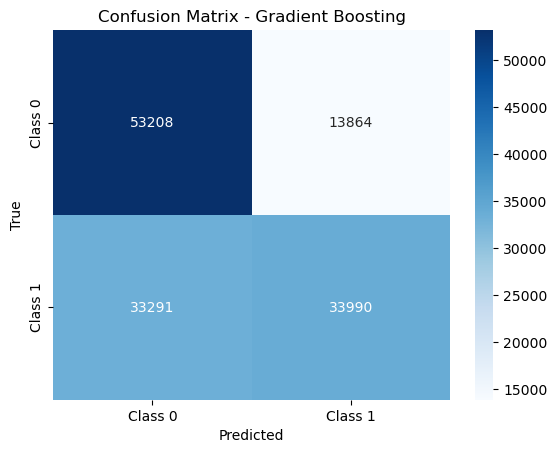

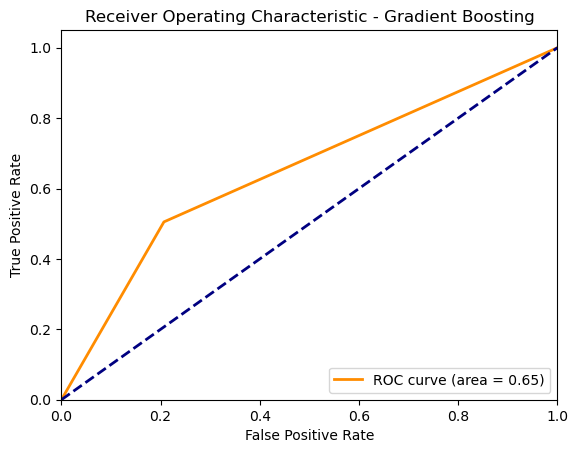

Classification Report for Gradient Boosting:

              precision    recall  f1-score   support

           0       0.62      0.79      0.69     67072
           1       0.71      0.51      0.59     67281

    accuracy                           0.65    134353
   macro avg       0.66      0.65      0.64    134353
weighted avg       0.66      0.65      0.64    134353



In [45]:
# 2. Gradient Boosting Classifier
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)
gb_pred = gb_model.predict(X_test)

print("\nGradient Boosting Model Evaluation:")
print_metrics(y_test, gb_pred, "Gradient Boosting")


XGBoost Model Evaluation:
XGBoost - Accuracy: 0.6489
XGBoost - F1 Score: 0.5901
XGBoost - Precision: 0.7102


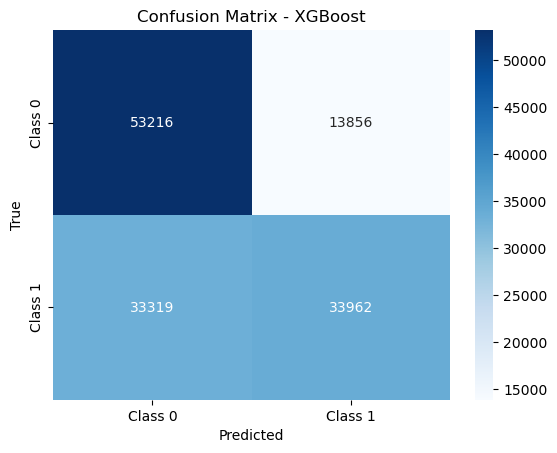

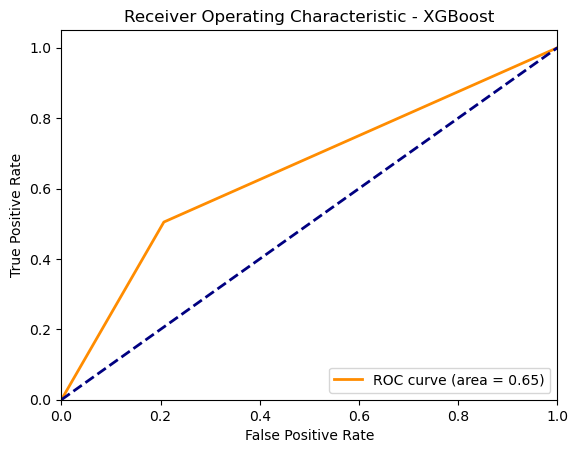

Classification Report for XGBoost:

              precision    recall  f1-score   support

           0       0.61      0.79      0.69     67072
           1       0.71      0.50      0.59     67281

    accuracy                           0.65    134353
   macro avg       0.66      0.65      0.64    134353
weighted avg       0.66      0.65      0.64    134353



In [46]:
# 3. XGBoost Classifier
xgb_model = xgb.XGBClassifier(n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)

print("\nXGBoost Model Evaluation:")
print_metrics(y_test, xgb_pred, "XGBoost")

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
4899/4899 ━━━━━━━━━━━━━━━━━━━━ 4s 633us/step - accuracy: 0.5763 - loss: 0.6954 - val_accuracy: 0.6283 - val_loss: 0.6463
Epoch 2/20
4899/4899 ━━━━━━━━━━━━━━━━━━━━ 3s 617us/step - accuracy: 0.6276 - loss: 0.6483 - val_accuracy: 0.6475 - val_loss: 0.6496
Epoch 3/20
4899/4899 ━━━━━━━━━━━━━━━━━━━━ 3s 596us/step - accuracy: 0.6355 - loss: 0.6453 - val_accuracy: 0.6400 - val_loss: 0.6409
Epoch 4/20
4899/4899 ━━━━━━━━━━━━━━━━━━━━ 3s 604us/step - accuracy: 0.6401 - loss: 0.6434 - val_accuracy: 0.6366 - val_loss: 0.6412
Epoch 5/20
4899/4899 ━━━━━━━━━━━━━━━━━━━━ 3s 595us/step - accuracy: 0.6420 - loss: 0.6412 - val_accuracy: 0.6450 - val_loss: 0.6386
Epoch 6/20
4899/4899 ━━━━━━━━━━━━━━━━━━━━ 3s 609us/step - accuracy: 0.6448 - loss: 0.6404 - val_accuracy: 0.6477 - val_loss: 0.6543
Epoch 7/20
4899/4899 ━━━━━━━━━━━━━━━━━━━━ 3s 610us/step - accuracy: 0.6439 - loss: 0.6405 - val_accuracy: 0.6477 - val_loss: 0.6371
Epoch 8/20
4899/4899 ━━━━━━━━━━━━━━━━━━━━ 3s 607us/step - accuracy: 0.6457 -

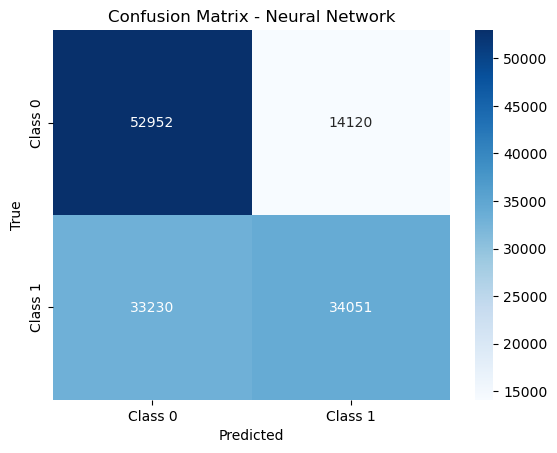

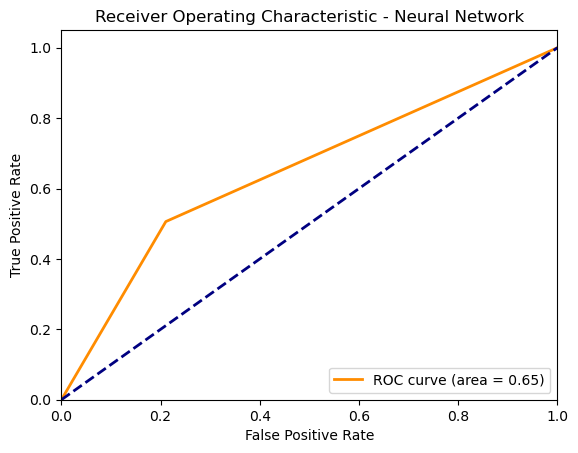

Classification Report for Neural Network:

              precision    recall  f1-score   support

           0       0.61      0.79      0.69     67072
           1       0.71      0.51      0.59     67281

    accuracy                           0.65    134353
   macro avg       0.66      0.65      0.64    134353
weighted avg       0.66      0.65      0.64    134353



In [47]:

# Deep Learning Models

# 4. Simple Neural Network
def create_nn_model(input_dim):
    model = Sequential()
    model.add(Dense(128, input_dim=input_dim, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
    return model

nn_model = create_nn_model(X_train.shape[1])
nn_model.fit(X_train, y_train, epochs=20, batch_size=128, validation_data=(X_val, y_val), verbose=1)
nn_pred = (nn_model.predict(X_test) > 0.5).astype("int32")

print("\nNeural Network Model Evaluation:")
print_metrics(y_test, nn_pred, "Neural Network")

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
4899/4899 ━━━━━━━━━━━━━━━━━━━━ 4s 698us/step - accuracy: 0.5834 - loss: 0.6822 - val_accuracy: 0.6269 - val_loss: 0.6457
Epoch 2/20
4899/4899 ━━━━━━━━━━━━━━━━━━━━ 3s 602us/step - accuracy: 0.6280 - loss: 0.6478 - val_accuracy: 0.6360 - val_loss: 0.6423
Epoch 3/20
4899/4899 ━━━━━━━━━━━━━━━━━━━━ 3s 612us/step - accuracy: 0.6357 - loss: 0.6441 - val_accuracy: 0.6444 - val_loss: 0.6389
Epoch 4/20
4899/4899 ━━━━━━━━━━━━━━━━━━━━ 3s 610us/step - accuracy: 0.6412 - loss: 0.6418 - val_accuracy: 0.6447 - val_loss: 0.6385
Epoch 5/20
4899/4899 ━━━━━━━━━━━━━━━━━━━━ 3s 602us/step - accuracy: 0.6419 - loss: 0.6417 - val_accuracy: 0.6476 - val_loss: 0.6378
Epoch 6/20
4899/4899 ━━━━━━━━━━━━━━━━━━━━ 3s 610us/step - accuracy: 0.6430 - loss: 0.6412 - val_accuracy: 0.6478 - val_loss: 0.6376
Epoch 7/20
4899/4899 ━━━━━━━━━━━━━━━━━━━━ 3s 612us/step - accuracy: 0.6449 - loss: 0.6399 - val_accuracy: 0.6480 - val_loss: 0.6369
Epoch 8/20
4899/4899 ━━━━━━━━━━━━━━━━━━━━ 3s 618us/step - accuracy: 0.6454 -

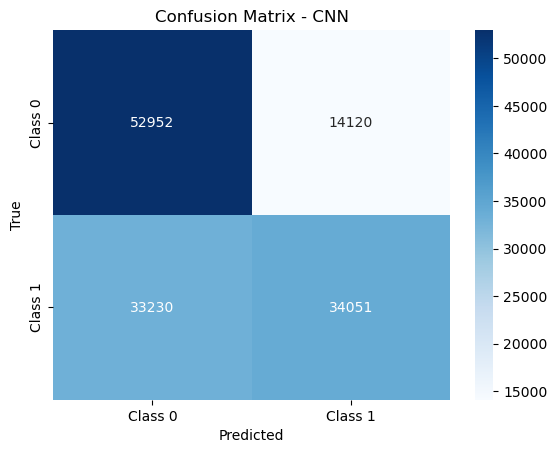

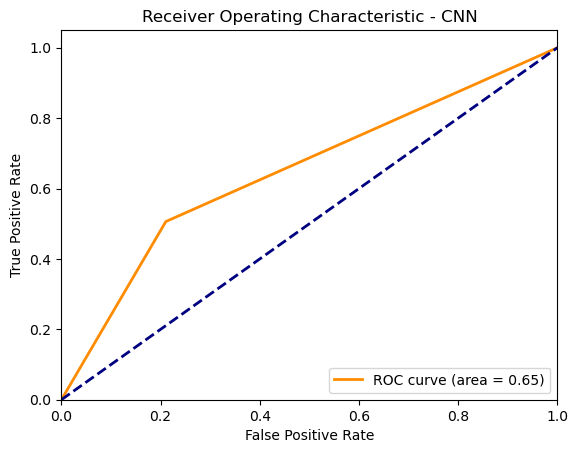

Classification Report for CNN:

              precision    recall  f1-score   support

           0       0.61      0.79      0.69     67072
           1       0.71      0.51      0.59     67281

    accuracy                           0.65    134353
   macro avg       0.66      0.65      0.64    134353
weighted avg       0.66      0.65      0.64    134353



In [48]:

# 5. Advanced Deep Learning Model (CNN-based)
def create_cnn_model(input_shape):
    model = Sequential()
    model.add(Dense(128, input_dim=input_shape[1], activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
    return model

cnn_model = create_cnn_model(X_train.shape)
cnn_model.fit(X_train, y_train, epochs=20, batch_size=128, validation_data=(X_val, y_val), verbose=1)
cnn_pred = (cnn_model.predict(X_test) > 0.5).astype("int32")

print("\nCNN Model Evaluation:")
print_metrics(y_test, cnn_pred, "CNN")



In [49]:
# Final Decision - Best Model
# Based on the evaluation metrics (accuracy, F1 score, precision), select the best model

models = {
    "Random Forest": rf_model,
    "Gradient Boosting": gb_model,
    "XGBoost": xgb_model,
    "Neural Network": nn_model,
    "CNN": cnn_model
}

# Evaluate the accuracy of each model
model_accuracies = {}
model_accuracies['Random Forest'] = accuracy_score(y_test, rf_pred)
model_accuracies['Gradient Boosting'] = accuracy_score(y_test, gb_pred)
model_accuracies['XGBoost'] = accuracy_score(y_test, xgb_pred)
model_accuracies['Neural Network'] = accuracy_score(y_test, nn_pred)
model_accuracies['CNN'] = accuracy_score(y_test, cnn_pred)

# Print the best model
best_model_name = max(model_accuracies, key=model_accuracies.get)
print(f"\nBest Model for the Dataset: {best_model_name} with Accuracy: {model_accuracies[best_model_name]:.4f}")



Best Model for the Dataset: Gradient Boosting with Accuracy: 0.6490


## Improvements

Steps in Code:

*   Apply SMOTE for Class Imbalance.
*   Hyperparameter Tuning using GridSearchCV.






In [52]:
import numpy as np
import h5py
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    f1_score,
    roc_auc_score,
    accuracy_score,
    precision_recall_curve,
    roc_curve
)
from sklearn.model_selection import GridSearchCV, StratifiedKFold, cross_val_score
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns


In [53]:

# Apply SMOTE to balance the classes
print("Applying SMOTE to balance the classes...")
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)
print(f"After SMOTE - X_train_balanced: {X_train_balanced.shape}, y_train_balanced: {y_train_balanced.shape}")

Applying SMOTE to balance the classes...
After SMOTE - X_train_balanced: (628472, 200), y_train_balanced: (628472,)


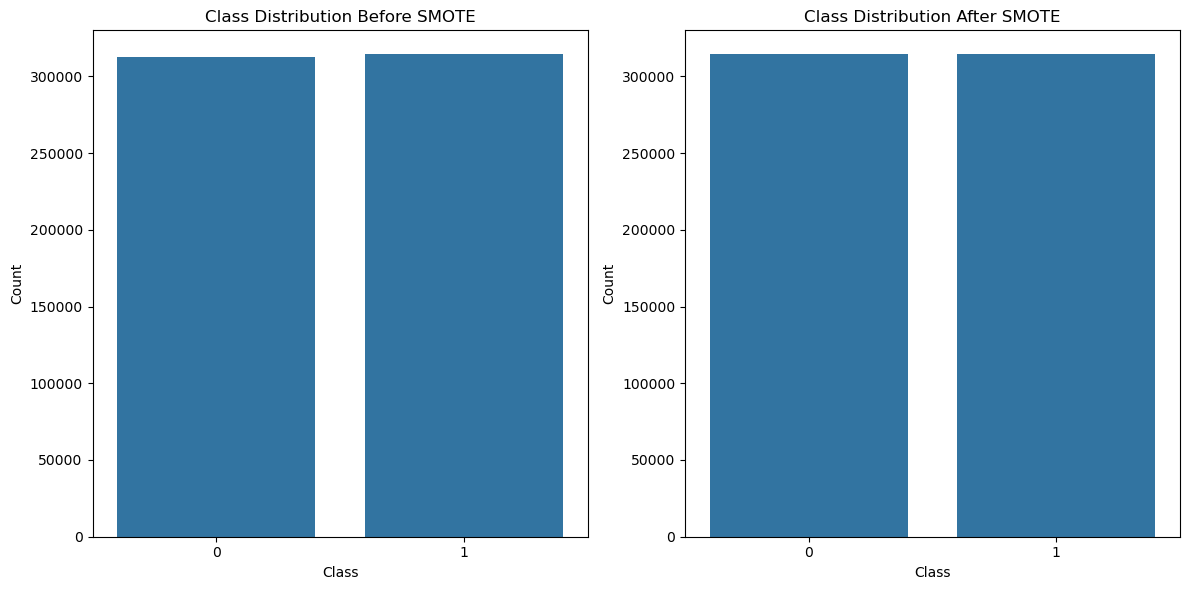

Before SMOTE: Counter({1: 314236, 0: 312742})
After SMOTE: Counter({0: 314236, 1: 314236})


In [54]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Visualize the class distribution before applying SMOTE
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.countplot(x=y_train)
plt.title('Class Distribution Before SMOTE')
plt.xlabel('Class')
plt.ylabel('Count')

# Visualize the class distribution after applying SMOTE
plt.subplot(1, 2, 2)
sns.countplot(x=y_train_balanced)
plt.title('Class Distribution After SMOTE')
plt.xlabel('Class')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

# Print the class distribution
print(f"Before SMOTE: {Counter(y_train)}")
print(f"After SMOTE: {Counter(y_train_balanced)}")


## Hyperparameter Tuning for Random Forest, Gradient Boosting, and XGBoost

In [56]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

In [57]:

# Use smaller dataset for faster execution
X_train_subset = X_train_balanced[:300000]
y_train_subset = y_train_balanced[:300000]
X_test_subset = X_test[:100000]
y_test_subset = y_test[:100000]

In [58]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluation Metrics
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
    plt.title(f"Confusion Matrix - {model_name}")
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

def plot_roc_curve(y_true, y_pred, model_name):
    fpr, tpr, _ = roc_curve(y_true, y_pred)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic - {model_name}')
    plt.legend(loc="lower right")
    plt.show()

def print_metrics(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    print(f"{model_name} - Accuracy: {accuracy:.4f}")
    print(f"\nClassification Report for {model_name}:\n{classification_report(y_true, y_pred)}")
    plot_confusion_matrix(y_true, y_pred, model_name)
    plot_roc_curve(y_true, y_pred, model_name)



Tuning Random Forest...
Fitting 3 folds for each of 16 candidates, totalling 48 fits
Random Forest Best Params: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 150}
Random Forest - Accuracy: 0.6481

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.61      0.79      0.69     49795
           1       0.71      0.50      0.59     50205

    accuracy                           0.65    100000
   macro avg       0.66      0.65      0.64    100000
weighted avg       0.66      0.65      0.64    100000



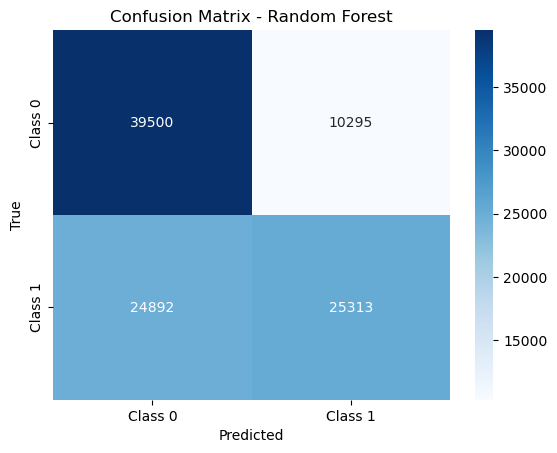

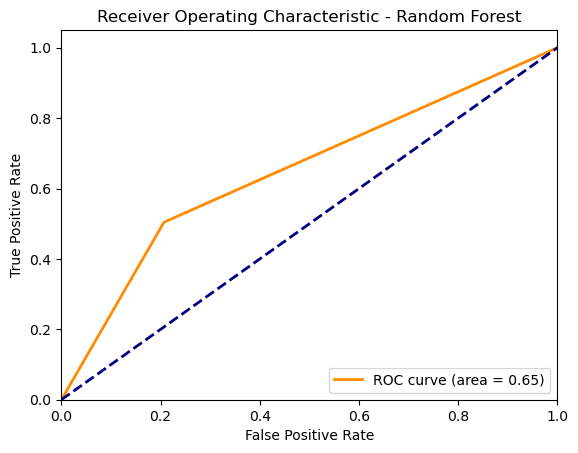

In [59]:
# Random Forest Tuning
rf_param_grid = {
    "n_estimators": [150, 200],
    "max_depth": [5, 20],
    "min_samples_split": [2, 3],
    "min_samples_leaf": [1, 2],
}

print("\nTuning Random Forest...")
rf = RandomForestClassifier(random_state=42)
rf_grid = GridSearchCV(rf, param_grid=rf_param_grid, scoring="accuracy", cv=3, verbose=2, n_jobs=-1)
rf_grid.fit(X_train_subset, y_train_subset)

rf_best = rf_grid.best_estimator_
print(f"Random Forest Best Params: {rf_grid.best_params_}")
rf_pred = rf_best.predict(X_test_subset)
print_metrics(y_test_subset, rf_pred, "Random Forest")


Tuning Gradient Boosting...
Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time= 1.8min
[CV] END max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time= 1.7min
[CV] END max_depth=5, min_samples_leaf=2, min_samples_split=3, n_estimators=200; total time= 1.6min
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=3, n_estimators=150; total time= 2.2min
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=150; total time= 2.2min
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=3, n_estimators=150; total time= 2.1min
[CV] END ..learning_rate=0.01, max_depth=2, n_estimators=250; total time=12.0min
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=250; total time=16.8min
[CV] END ...learning_rate=0.1, max_depth=2, n_estimators=500; total time=24.0min
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_

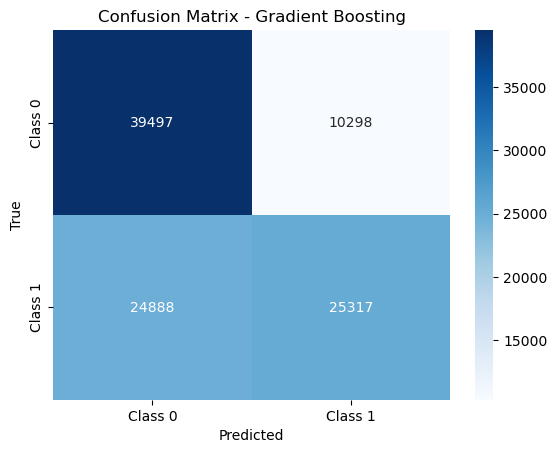

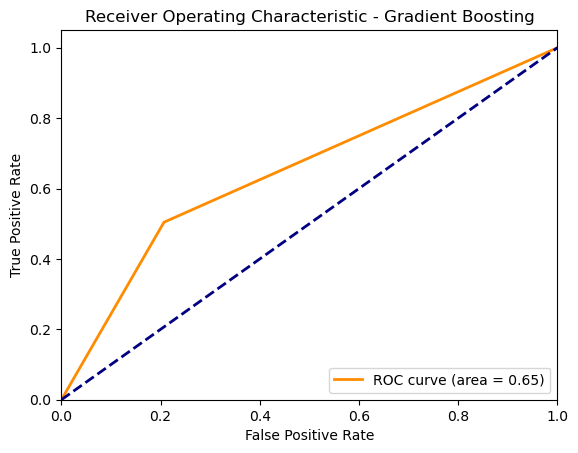

In [60]:

# Gradient Boosting Tuning
gb_param_grid = {
    "n_estimators": [250, 500],
    "learning_rate": [0.01, 0.1],
    "max_depth": [2, 3]
}

print("\nTuning Gradient Boosting...")
gb = GradientBoostingClassifier(random_state=42)
gb_grid = GridSearchCV(gb, param_grid=gb_param_grid, scoring="accuracy", cv=3, verbose=2, n_jobs=-1)
gb_grid.fit(X_train_subset, y_train_subset)

gb_best = gb_grid.best_estimator_
print(f"Gradient Boosting Best Params: {gb_grid.best_params_}")
gb_pred = gb_best.predict(X_test_subset)
print_metrics(y_test_subset, gb_pred, "Gradient Boosting")


Tuning XGBoost...
Fitting 2 folds for each of 8 candidates, totalling 16 fits
XGBoost Best Params: {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 500}
XGBoost - Accuracy: 0.6482

Classification Report for XGBoost:
              precision    recall  f1-score   support

           0       0.61      0.79      0.69     49795
           1       0.71      0.50      0.59     50205

    accuracy                           0.65    100000
   macro avg       0.66      0.65      0.64    100000
weighted avg       0.66      0.65      0.64    100000



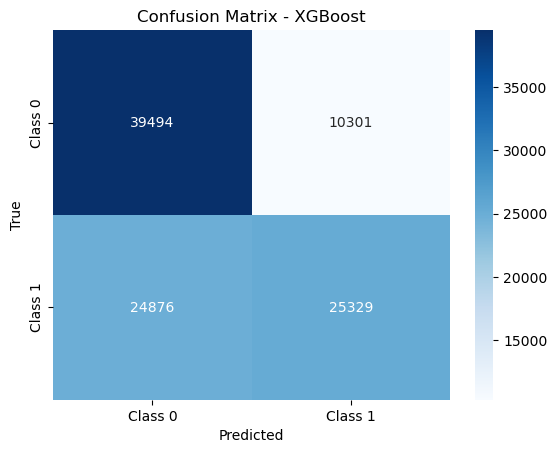

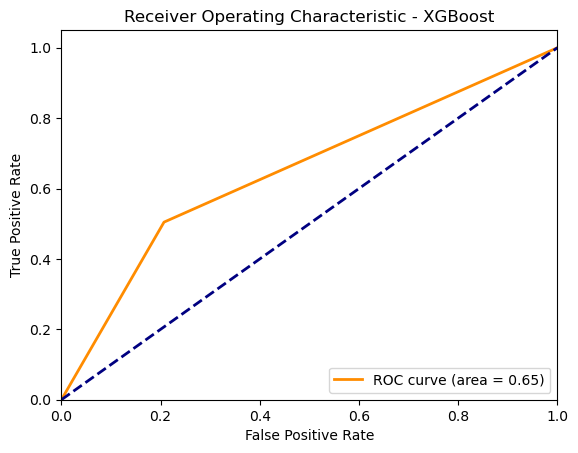

In [61]:

# XGBoost Tuning
xgb_param_grid = {
    "n_estimators": [200, 500],
    "learning_rate": [0.01, 0.2],
    "max_depth": [3, 5]
}

print("\nTuning XGBoost...")
xgb = XGBClassifier(random_state=42)
xgb_grid = GridSearchCV(xgb, param_grid=xgb_param_grid, scoring="accuracy", cv=2, verbose=2, n_jobs=-1)
xgb_grid.fit(X_train_subset, y_train_subset)

xgb_best = xgb_grid.best_estimator_
print(f"XGBoost Best Params: {xgb_grid.best_params_}")
xgb_pred = xgb_best.predict(X_test_subset)
print_metrics(y_test_subset, xgb_pred, "XGBoost")



Training Neural Network...


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/25
4910/4910 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - accuracy: 0.6337 - loss: 0.6511 - val_accuracy: 0.6480 - val_loss: 0.6543
Epoch 2/25
4910/4910 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - accuracy: 0.6470 - loss: 0.6386 - val_accuracy: 0.5029 - val_loss: 0.9023
Epoch 3/25
4910/4910 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - accuracy: 0.6452 - loss: 0.6394 - val_accuracy: 0.5397 - val_loss: 0.7045
Epoch 4/25
4910/4910 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - accuracy: 0.6463 - loss: 0.6394 - val_accuracy: 0.5082 - val_loss: 0.8312
Epoch 5/25
4910/4910 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - accuracy: 0.6437 - loss: 0.6414 - val_accuracy: 0.5029 - val_loss: 3.4634
Epoch 6/25
4910/4910 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - accuracy: 0.6413 - loss: 0.6429 - val_accuracy: 0.5084 - val_loss: 1.0921
4199/4199 ━━━━━━━━━━━━━━━━━━━━ 1s 285us/step
Neural Network - Accuracy: 0.6466

Classification Report for Neural Network:
              precision    recall  f1-score   support

           0       0.61      0.79      0.69

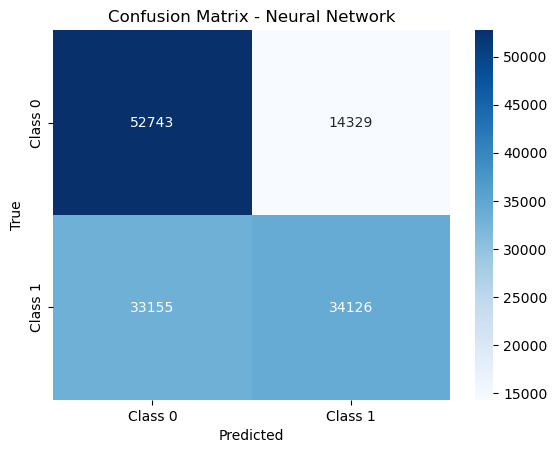

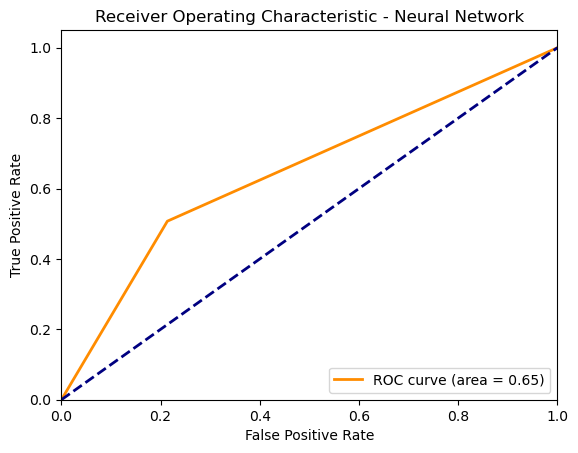

In [62]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

def create_nn_model():
    model = Sequential()
    model.add(Dense(256, input_dim=X_train_balanced.shape[1], activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    model.add(Dense(128, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
    return model

print("\nTraining Neural Network...")
nn_model = create_nn_model()
early_stopping = EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True)
nn_history = nn_model.fit(X_train_balanced, y_train_balanced, epochs=25, batch_size=128, validation_data=(X_val, y_val), callbacks=[early_stopping], verbose=1)

# Evaluate
nn_pred = (nn_model.predict(X_test) > 0.5).astype("int32")
print_metrics(y_test, nn_pred, "Neural Network")


Epoch 1/50
9820/9820 ━━━━━━━━━━━━━━━━━━━━ 183s 18ms/step - accuracy: 0.5574 - loss: 0.7611 - val_accuracy: 0.4980 - val_loss: 0.8385 - learning_rate: 1.0000e-04
Epoch 2/50
9820/9820 ━━━━━━━━━━━━━━━━━━━━ 175s 18ms/step - accuracy: 0.6330 - loss: 0.6509 - val_accuracy: 0.4980 - val_loss: 1.2609 - learning_rate: 1.0000e-04
Epoch 3/50
9820/9820 ━━━━━━━━━━━━━━━━━━━━ 182s 18ms/step - accuracy: 0.6437 - loss: 0.6453 - val_accuracy: 0.4981 - val_loss: 0.7309 - learning_rate: 1.0000e-04
Epoch 4/50
9820/9820 ━━━━━━━━━━━━━━━━━━━━ 177s 18ms/step - accuracy: 0.6462 - loss: 0.6430 - val_accuracy: 0.5581 - val_loss: 0.7389 - learning_rate: 1.0000e-04
Epoch 5/50
9820/9820 ━━━━━━━━━━━━━━━━━━━━ 180s 18ms/step - accuracy: 0.6472 - loss: 0.6412 - val_accuracy: 0.5027 - val_loss: 13.7474 - learning_rate: 1.0000e-04
Epoch 6/50
9819/9820 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6471 - loss: 0.6409
Epoch 6: ReduceLROnPlateau reducing learning rate to 4.999999873689376e-05.
9820/9820 ━━━━━━━━━━━━━━━━━━━

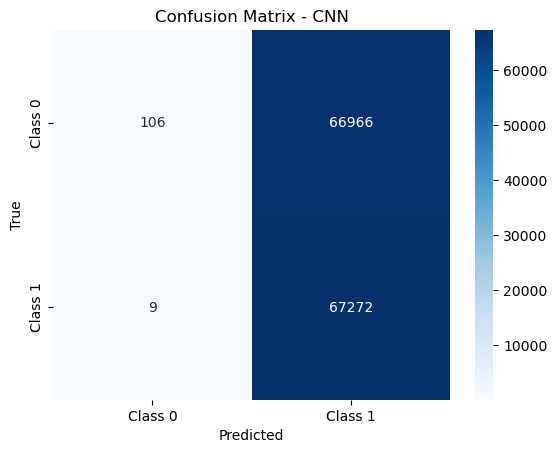

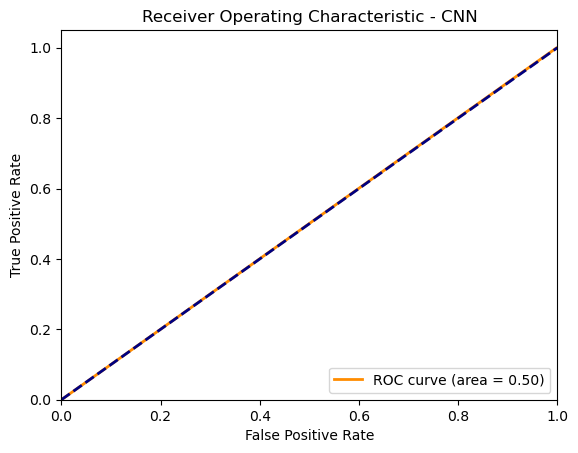

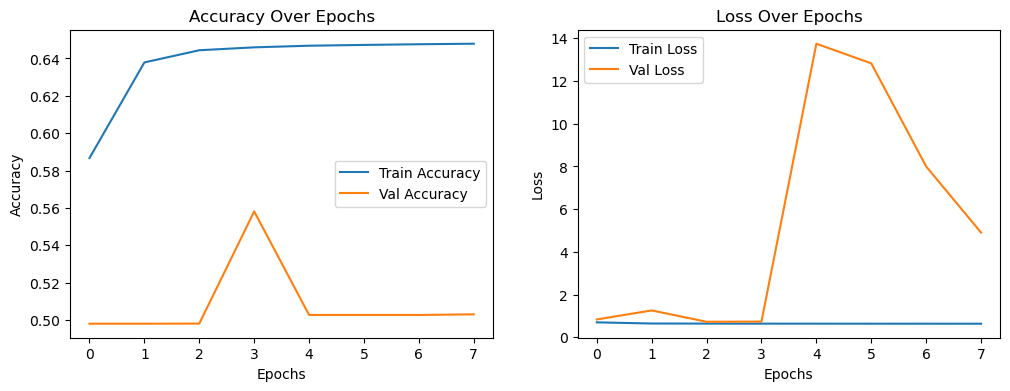

In [66]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv1D, MaxPooling1D, Flatten, BatchNormalization, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Ensure labels are in the correct format
y_train_balanced = np.array(y_train_balanced, dtype="float32")
y_val = np.array(y_val, dtype="float32")
y_test = np.array(y_test, dtype="float32")

# Reshape Input for CNN
X_train_cnn = X_train_balanced.reshape(X_train_balanced.shape[0], X_train_balanced.shape[1], 1)
X_val_cnn = X_val.reshape(X_val.shape[0], X_val.shape[1], 1)
X_test_cnn = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Define the CNN Model
cnn_model = Sequential([
    Input(shape=(X_train_cnn.shape[1], 1)),  # Use explicit Input layer
    Conv1D(filters=64, kernel_size=5, activation='relu'),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),
    Dropout(0.3),  # Moderate dropout for regularization
    Conv1D(filters=128, kernel_size=3, activation='relu'),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),
    Dropout(0.4),
    Flatten(),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.4),
    Dense(1, activation='sigmoid')  # Binary classification
])

# Compile the model
cnn_model.compile(
    optimizer=Adam(learning_rate=0.0001),  # Reduced learning rate for stability
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=1)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1)

# Train the model
history = cnn_model.fit(
    X_train_cnn,
    y_train_balanced,
    validation_data=(X_val_cnn, y_val),
    epochs=50,  # Increased epochs
    batch_size=64,  # Adjusted batch size
    verbose=1,
    callbacks=[early_stopping, lr_scheduler]
)

# Evaluate the model on the test set
cnn_pred = (cnn_model.predict(X_test_cnn) > 0.5).astype("int32")

# Define evaluation functions
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
    plt.title(f"Confusion Matrix - {model_name}")
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

def plot_roc_curve(y_true, y_pred, model_name):
    fpr, tpr, _ = roc_curve(y_true, y_pred)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic - {model_name}')
    plt.legend(loc="lower right")
    plt.show()

def print_metrics(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    print(f"{model_name} - Accuracy: {accuracy:.4f}")
    print(f"\nClassification Report for {model_name}:\n{classification_report(y_true, y_pred)}")
    plot_confusion_matrix(y_true, y_pred, model_name)
    plot_roc_curve(y_true, y_pred, model_name)

# Evaluate and display metrics
print_metrics(y_test, cnn_pred, "CNN")

# Plot training and validation accuracy and loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()



Model Performance:
Random Forest - Accuracy: 0.6481
Gradient Boosting - Accuracy: 0.6481
XGBoost - Accuracy: 0.6482
Neural Network - Accuracy: 0.6466
CNN - Accuracy: 0.5015

Best Model for the Dataset: XGBoost with Accuracy: 0.6482


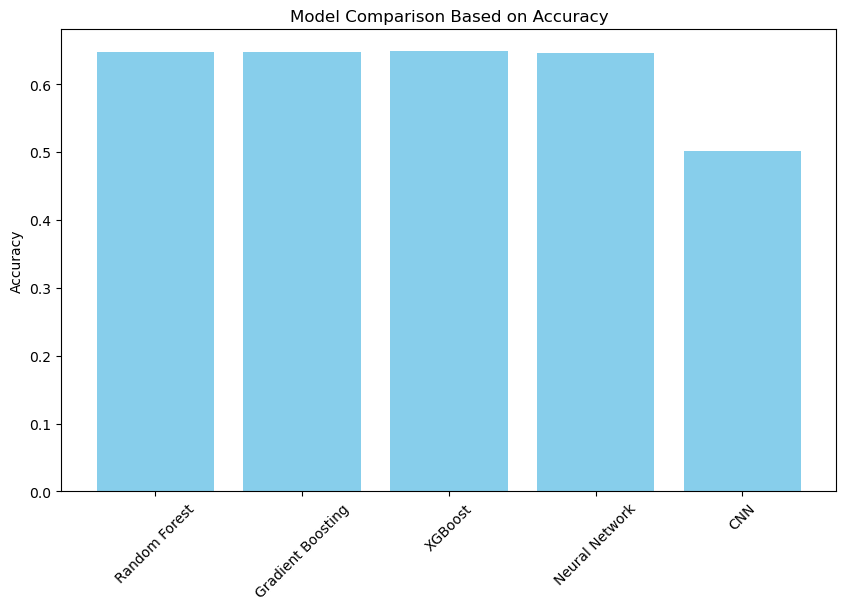


Best model (XGBoost) saved as XGBoost_model.pkl


In [68]:
# Define the models and their predictions
models = {
    "Random Forest": rf_best,
    "Gradient Boosting": gb_best,
    "XGBoost": xgb_best,
    "Neural Network": nn_model,
    "CNN": cnn_model
}

# Compute the accuracy for all models
model_accuracies = {
    "Random Forest": accuracy_score(y_test_subset, rf_pred),
    "Gradient Boosting": accuracy_score(y_test_subset, gb_pred),
    "XGBoost": accuracy_score(y_test_subset, xgb_pred),
    "Neural Network": accuracy_score(y_test, nn_pred),
    "CNN": accuracy_score(y_test, cnn_pred)
}

# Print the metrics for all models
print("\nModel Performance:")
for model_name, accuracy in model_accuracies.items():
    print(f"{model_name} - Accuracy: {accuracy:.4f}")

# Find the best model based on accuracy
best_model_name = max(model_accuracies, key=model_accuracies.get)
best_model_accuracy = model_accuracies[best_model_name]
print(f"\nBest Model for the Dataset: {best_model_name} with Accuracy: {best_model_accuracy:.4f}")

# Plot the accuracy of all models
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(model_accuracies.keys(), model_accuracies.values(), color='skyblue')
plt.ylabel('Accuracy')
plt.title('Model Comparison Based on Accuracy')
plt.xticks(rotation=45)
plt.show()

# Save the best model
import joblib

best_model = models[best_model_name]
if best_model_name in ["Random Forest", "Gradient Boosting", "XGBoost"]:
    joblib.dump(best_model, f"{best_model_name}_model.pkl")
    print(f"\nBest model ({best_model_name}) saved as {best_model_name}_model.pkl")
elif best_model_name in ["Neural Network", "CNN"]:
    best_model.save(f"{best_model_name}_model.h5")
    print(f"\nBest model ({best_model_name}) saved as {best_model_name}_model.h5")
